# Lab 4

In [3]:
!pip install psycopg2

In [6]:
import pandas
import configparser
import psycopg2

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [8]:
cur = conn.cursor()

In [7]:
sql_statement = """
                select * from gp18.student
                """

In [10]:
df_student = pandas.read_sql_query(sql_statement,conn)
df_student[:]

,s_email,s_name,major
0,randomstudent2,Joe,Biology
1,randomstudent3,Bill,Math
2,randomstudent4,Kyle,IA
3,randomstudent1,Jim,IA


In [11]:
sql_statement = """
                select gp18.professor.p_name,
                gp18.course.c_name
                from gp18.professor
                inner join gp18.course
                on gp18.professor.p_email = gp18.course.p_email
                """

In [13]:
df_prof_course = pandas.read_sql_query(sql_statement, conn)
df_prof_course[:]

,p_name,c_name
0,John Smith,IA300
1,John Rob,IA340
2,Dr. Dude,IA313
3,Dr. Danzell,AML
4,Dr. Danzell,IA420


In [16]:
sql_statement = """
                select count(c_number) as num_enrolled,
                c_number
                from gp18.enroll_list
                group by c_number
                """

<AxesSubplot:xlabel='c_number'>

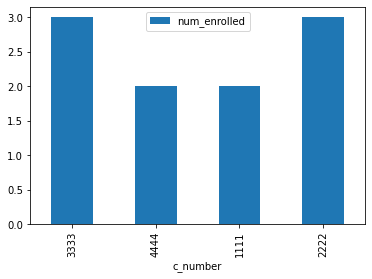

In [17]:
df_num_enroll = pandas.read_sql_query(sql_statement, conn)
df_num_enroll.plot.bar(x = 'c_number', y = 'num_enrolled')

In [29]:
prof_courses = """
                select gp18.professor.p_name,
                    count(gp18.course.c_name) as num_taught
                from gp18.professor
                inner join gp18.course
                on gp18.professor.p_email = gp18.course.p_email
                group by gp18.professor.p_name
                order by num_taught desc
                """

<AxesSubplot:xlabel='p_name'>

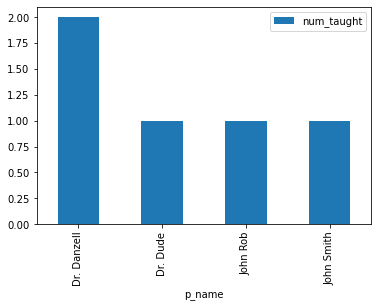

In [31]:
df = pandas.read_sql_query(prof_courses, conn)
df.plot.bar(x = 'p_name', y = 'num_taught')

In [38]:
sql_statement = """
                insert into gp18.professor(p_email, p_name, office_number)
                values ('new_email', 'Kyle Z', '107')
                """

In [39]:
cur.execute(sql_statement)

In [37]:
conn.rollback()

In [40]:
conn.commit()

In [2]:
q5_insert_course_sql = """
            insert into gp18.course(c_number,c_name,c_room,p_email)
            values('7777','Typing101','607','new_email')
            """

In [9]:
cur.execute(q5_insert_course_sql)

In [10]:
conn.commit()

In [11]:
df=pandas.read_sql_query('select * from gp18.course',conn)
df[:]

,c_number,c_name,c_room,p_email
0,1111,IA300,ISAT 123,randomemail1
1,2222,IA340,ISAT 145,randomemail2
2,4444,IA313,ISAT 560,randomemail4
3,IA480,AML,ISAT148,danzellog@jmu.edu
4,3333,IA420,ISAT 690,danzellog@jmu.edu
5,7777,Typing101,607,new_email


In [12]:
q6_update_course_sql ="""
                    update gp18.course
                    set p_email = 'new_email'
                    where p_email ='randomemail2'
                    """

In [13]:
cur.execute(q6_update_course_sql)

In [14]:
conn.commit()

In [15]:
q6_delete_prof_sql = """
                    delete from gp18.professor
                    where p_email = 'randomemail2'
                    """

In [16]:
cur.execute(q6_delete_prof_sql)

In [17]:
conn.commit()

In [18]:
df=pandas.read_sql_query('select * from gp18.professor',conn)
df[:]

,p_email,p_name,office_number
0,randomemail1,John Smith,123
1,randomemail4,Dr. Dude,789
2,danzellog@jmu.edu,Dr. Danzell,ISAT101
3,new_email,Kyle Z,107


In [19]:
cur.close()

In [20]:
conn.close()